# Volcanic Forcings and Feedback
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geoscience, Princeton University

In [1]:
from lib.util import year_shift
import xlearn

%matplotlib notebook

In [2]:
nino_ens = [1, 3, 4, 7, 9, 12, 17, 22, 26, 29]
nina_ens = [2, 5, 6, 8, 10, 11, 16, 23, 27, 30]
neut_ens = [13, 14, 15, 18, 19, 20, 21, 24, 25, 28]

In [3]:
if 'das' in globals() or 'das' in locals():
    pass
else:
    das = dict()

## t_surf

In [23]:
# data
dataname = 't_surf'
volcs = ['StMaria', 'Agung', 'Pinatubo']
years = [1902, 1963, 1991]
months = [10, 3, 6]
n_years = 2

# volc
ifiles = [f'data/{volc}_PI_ens_noleap.atmos_month.{dataname}.nc'
         for volc in volcs]
for volc, ifile, yyyy, mm in zip(volcs, ifiles, years, months):
    key = f'{volc}_{dataname}'
    print(key)
    tspan = slice(f'{yyyy+1}-{mm:02d}', f'{yyyy+1+n_years}-{mm-1:02d}')
    da = xr.open_dataarray(ifile).sel(time=tspan).mean('time')
    das[key] = da

# volc_nudge
ifiles = [f'data/{volc}_ens_noleap_nudgeclimo_all_model1860.atmos_month.{dataname}.nc'
         for volc in volcs]
for volc, ifile, yyyy, mm in zip(volcs, ifiles, years, months):
    key = f'{volc}_nudge_{dataname}'
    print(key)
    tspan = slice(f'{yyyy+1}-{mm:02d}', f'{yyyy+1+n_years}-{mm-1:02d}')
    da = xr.open_dataarray(ifile).sel(time=tspan).mean('time')
    das[key] = da

# ctl
ifile = f'data/CTL1860_noleap_tigercpu_intelmpi_18_576PE.atmos_month.{dataname}.nc'
for volc, yyyy, mm in zip(volcs, years, months):
    key = f'{volc}_ctl_{dataname}'
    print(key)
    tspan = slice(mm-1+12, mm-1+12+n_years*12)
    da = xr.open_dataarray(ifile).isel(time=tspan).mean('time')
    das[key] = da

# ctl_nudge
ifile = f'data/nudgeclimo_all_model_CTL1860_tigercpu_intelmpi_18_576PE.atmos_month.{dataname}.nc'
for volc, yyyy, mm in zip(volcs, years, months):
    key = f'{volc}_nudge_ctl_{dataname}'
    print(key)
    tspan = slice(mm-1+12, mm-1+12+n_years*12)
    da = xr.open_dataarray(ifile).isel(time=tspan).mean('time')
    das[key] = da

StMaria_t_surf
Agung_t_surf
Pinatubo_t_surf
StMaria_nudge_t_surf
Agung_nudge_t_surf
Pinatubo_nudge_t_surf
StMaria_ctl_t_surf


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


Agung_ctl_t_surf
Pinatubo_ctl_t_surf
StMaria_nudge_ctl_t_surf
Agung_nudge_ctl_t_surf
Pinatubo_nudge_ctl_t_surf


<IPython.core.display.Javascript object>


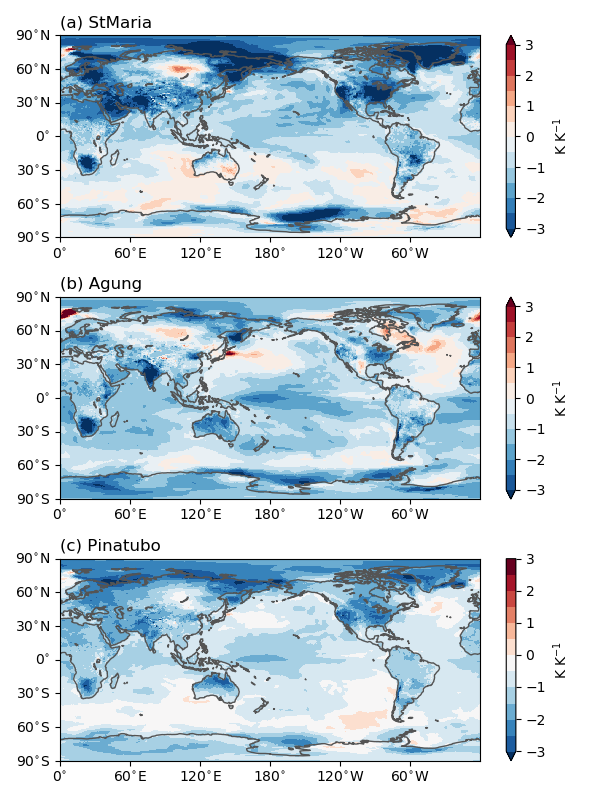

<xarray.DataArray ()>
array(-0.20318589711610818)
<xarray.DataArray ()>
array(-0.24339776921936845)
<xarray.DataArray ()>
array(-0.42725910413072066)


In [47]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(6, 8), sharey=True)
dataname = 't_surf'
units = 'K'
levels = np.arange(-3, 3.1, .5)

ax = axes[0]
plt.sca(ax)
volc = 'StMaria'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
    .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'(a) {volc}', loc='left')

ax = axes[1]
plt.sca(ax)
volc = 'Agung'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
    .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'(b) {volc}', loc='left')

ax = axes[2]
plt.sca(ax)
volc = 'Pinatubo'

keyv, keyc = f'{volc}_{dataname}', f'{volc}_ctl_{dataname}'
da = das[keyv] - das[keyc]
da.mean('en').pipe(lambda da: da/da.geo.fldmean()*(-1)) \
    .rename('K K$^{-1}$').plot(robust=True, levels=levels, center=0, ax=ax)
mapplot(ax=ax)

print(da.mean('en').geo.fldmean())
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(f'(c) {volc}', loc='left')

plt.tight_layout()

figname = f'figs/fig_shade_{dataname}.pdf'
# plt.savefig(figname)